## **Ejercicio 4 - Estadística descriptiva**

Debe crearse un cuaderno de python (.ipynb) en el que mostrar información acerca del juego Hangman y de los resultados de las distintas partidas. Deberá incluir:

In [2]:

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

import pandas as pd
import matplotlib.pyplot as plt


In [4]:

# Cargamos los datos desde mi Google Drive
df_games = pd.read_csv("/content/drive/MyDrive/PABLO/PYTHON/games.csv")
df_rounds_in_games = pd.read_csv("/content/drive/MyDrive/PABLO/PYTHON/rounds_in_games.csv")
df_words = pd.read_csv("/content/drive/MyDrive/PABLO/PYTHON/words.csv", header=None, names=["Words"])

## **WORDS**

### 1.   Distribución de preguntas por número de letras.




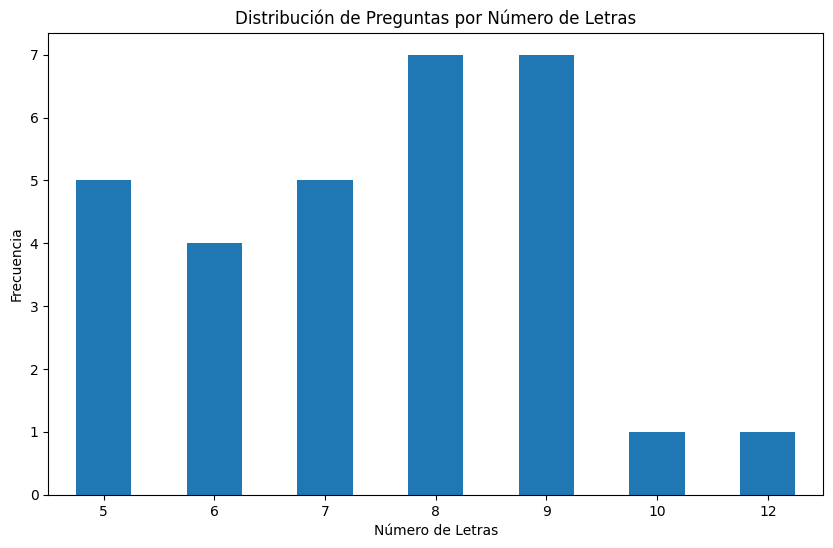

Número de letras: 5
Palabras: boxeo, lucha, padel, rugby, tenis

Número de letras: 6
Palabras: futbol, hipica, hockey, karate

Número de letras: 7
Palabras: beisbol, biatlon, criquet, curling, esgrima

Número de letras: 8
Palabras: ciclismo, escalada, gimnasia, natacion, patinaje, triatlon, voleibol

Número de letras: 9
Palabras: atletismo, badminton, balonmano, pentatlon, snowboard, taekwondo, waterpolo

Número de letras: 10
Palabras: baloncesto

Número de letras: 12
Palabras: halterofilia



In [5]:
# Calcular el número de letras en cada palabra
df_words['Num_Letters'] = df_words['Words'].apply(len)

# Añadir la columna 'Length' con la longitud de cada palabra
df_words['Length'] = df_words['Words'].apply(len)

# Graficar la distribución de preguntas por número de letras
plt.figure(figsize=(10, 6))
df_words['Length'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Preguntas por Número de Letras')
plt.xlabel('Número de Letras')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

# Imprimir las palabras agrupadas por número de letras
grouped_words = df_words.groupby('Length')['Words'].apply(list)

for length, words in grouped_words.items():
    print(f"Número de letras: {length}")
    print(f"Palabras: {', '.join(words)}\n")


## **ROUNDS**





### 2.  Número de usuarios diferentes que han participado en alguna partida.






In [6]:
# Determinar el número de usuarios diferentes que han participado en alguna partida
num_unique_users = df_games['username'].nunique()

print(f"Número de usuarios diferentes que han participado en alguna partida: {num_unique_users}")

Número de usuarios diferentes que han participado en alguna partida: 7



3.  Top 5 de usuarios que más rondas han ganado por partida.



In [7]:
# Encontrar la columna que contiene 'final_score' usando el método filter
score_column = df_games.filter(like='final_score').columns[0]

# Agrupar por usuario y sumar las rondas ganadas
user_scores = df_games.groupby('username')[score_column].sum().reset_index()

# Renombrar la columna de score a 'final_score' para mayor claridad
user_scores.rename(columns={score_column: 'Rondas Ganadas'}, inplace=True)

# Ordenar los usuarios por el número de rondas ganadas en orden descendente
top_users = user_scores.sort_values(by='Rondas Ganadas', ascending=False).head(5)

print("Top 5 de usuarios que más rondas han ganado:")
print(top_users)

Top 5 de usuarios que más rondas han ganado:
  username  Rondas Ganadas
2    Pablo              11
6     Sara              11
0    Irene               8
4     Rafa               6
3     Pepe               4


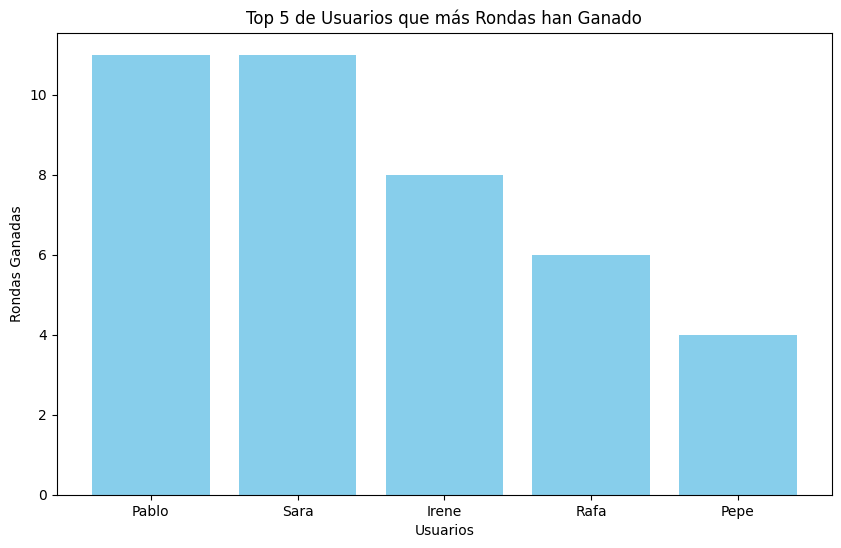

In [9]:

# Graficar el top 5 de usuarios
plt.figure(figsize=(10, 6))
plt.bar(top_users['username'], top_users['Rondas Ganadas'], color='skyblue')
plt.xlabel('Usuarios')
plt.ylabel('Rondas Ganadas')
plt.title('Top 5 de Usuarios que más Rondas han Ganado')
plt.show()

### **GAME**

### 4. Top 5 de usuarios con más puntuación final

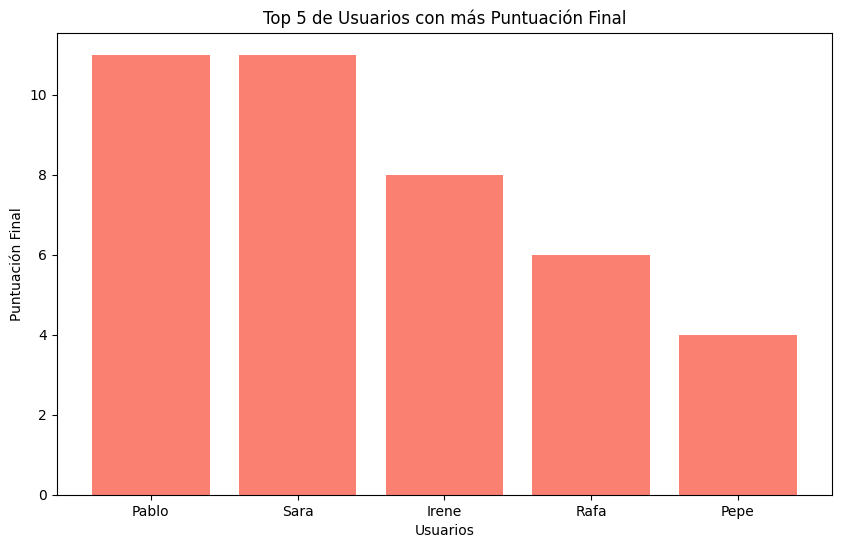

In [17]:

# Si cada ronda ganada equivale a un punto, entonces la puntuación total de un
# usuario es la suma de las rondas ganadas. Al tener los datos agrupados por
# usuario y sumados, sólo necesitamos cambiar el nombre de eje vertical de la
# gráfica a Puntuación Final.

# Graficar el top 5 de usuarios por puntuación final
plt.figure(figsize=(10, 6))
plt.bar(top_users['username'], top_users['Rondas Ganadas'], color='salmon')
plt.xlabel('Usuarios')
plt.ylabel('Puntuación Final')
plt.title('Top 5 de Usuarios con más Puntuación Final')
plt.show()

### 5. Top 5 de usuarios con más puntuación media (media de la puntuación de sus partidas)

Top 5 de usuarios con más puntuación media:
  username  puntuacion_media
1  Juanito              3.00
2    Pablo              2.75
6     Sara              2.75
0    Irene              2.67
3     Pepe              2.00


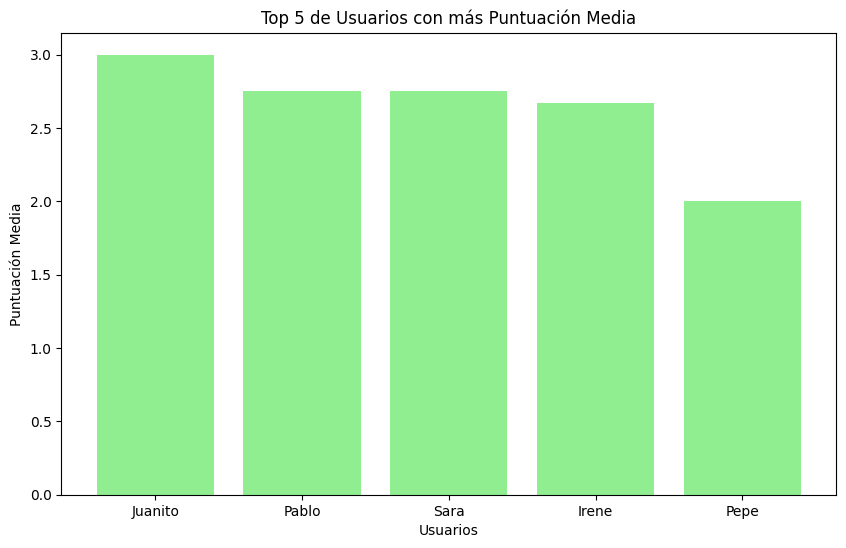

In [23]:
# Agrupar por usuario y calcular la media de las puntuaciones
usuarios_puntuacion_media = df_games.groupby('username')[score_column].mean().reset_index()

# Renombrar la columna de score a 'mean_score' para mayor claridad
usuarios_puntuacion_media.rename(columns={score_column: 'puntuacion_media'}, inplace=True)

# Ordenar los usuarios por la puntuación media en orden descendente
top_usuarios_puntuacion_media = usuarios_puntuacion_media.sort_values(by='puntuacion_media', ascending=False).head(5).round(2)

print("Top 5 de usuarios con más puntuación media:")
print(top_usuarios_puntuacion_media)

# Graficar el top 5 de usuarios por puntuación media
plt.figure(figsize=(10, 6))
plt.bar(top_usuarios_puntuacion_media['username'], top_usuarios_puntuacion_media['puntuacion_media'], color='lightgreen')
plt.xlabel('Usuarios')
plt.ylabel('Puntuación Media')
plt.title('Top 5 de Usuarios con más Puntuación Media')
plt.show()

### 6. Distribución de las puntuaciones de las partidas

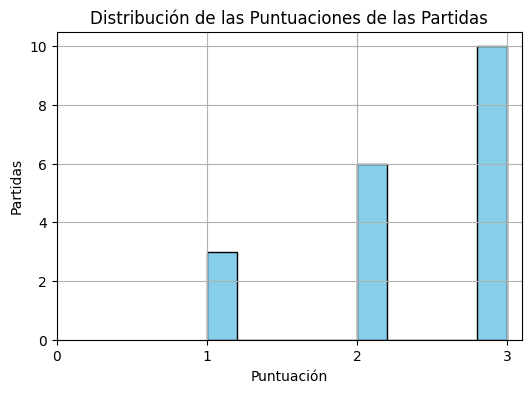

In [30]:
# Crear un histograma de las puntuaciones
plt.figure(figsize=(6, 4))
plt.hist(df_games[score_column], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Puntuación')
plt.ylabel('Partidas')
plt.title('Distribución de las Puntuaciones de las Partidas')
plt.grid(True)
plt.xticks([0, 1, 2, 3])
plt.show()